<a href="https://colab.research.google.com/github/AlanLinsAlves/Projetos_Pessoais/blob/main/energia_renov_por_regiao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Um gráfico de barras apresentável sobre a potência gerada a partir de fontes de energia renováveis no Brasil

## Tratamento dos dados

In [1]:
#Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Visualizando base de dados
pd.read_excel('/content/BD SIGA 01122020.xlsx').head(3)

,Data de referência dos dados: 01 de dezembro de 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Empreendimento,CEG,UF,Fonte,Fase,Origem,Tipo,Tipo de Atuação,Combustível Final,Entrada em Operação,Potência Outorgada (kW),Potência Fiscalizada (kW),Garantia Fisica (kW),Geração Qualificada,Latitude (GMS),Longitude (GMS),Início Vigência,Fim Vigência,Proprietário / Regime de Exploração,Cod e Desc Sub-Bacia,Município (s)
1,14 de Julho,UHE.PH.RS.000012-4,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,Potencial hidráulico,25/12/2008,100000,100710,47500,Não,"29°3'53,136""S","51°40'29,824""W",2001-03-15 00:00:00,2036-03-15 00:00:00,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
2,29 de Outubro,UTE.PE.SC.029920-0,SC,UTE,Operação,Fóssil,Petróleo,Registro,Óleo Diesel,07/10/2008,62,62,0,Não,"26° 29' 9,370"" S","49° 5' 10,100"" W",NaN,NaN,100% para Condomínio Residencial 29 de Outubro...,NaN,Jaraguá do Sul - SC


In [3]:
#Lendo a base de dados de forma mais adequada
dados = pd.read_excel('/content/BD SIGA 01122020.xlsx',
                      skiprows = [0],
                      usecols = ['UF', 'Fonte', 'Fase', 'Origem',
                                 'Potência Outorgada (kW)',
                                 'Potência Fiscalizada (kW)'])

In [4]:
#Mudando o nome de algumas colunas só por conveniência
dados.columns = ['UF', 'Tipo_empr', 'Fase', 'Fonte_Energia',
                 'Pot_out', 'Pot_fis']

In [5]:
#Dando uma olhada nas cinco primeiras linhas
dados.head()

,UF,Tipo_empr,Fase,Fonte_Energia,Pot_out,Pot_fis
0,RS,UHE,Operação,Hídrica,100000.0,100710.0
1,SC,UTE,Operação,Fóssil,62.0,62.0
2,MG,UTE,Operação,Fóssil,240.0,240.0
3,SP,UTE,Operação,Fóssil,3840.0,3840.0
4,SP,UTE,Operação,Fóssil,6400.0,6400.0


In [6]:
#Criando dicionário com as regioes do Brasil
regioes = {'Norte': ['AM', 'PA', 'AC', 'RO', 'RR', 'AP', 'TO'],
           'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
           'Centro-Oeste': ['DF', 'GO', 'MS', 'MT'],
           'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
           'Sul': ['PR', 'SC', 'RS']}

In [7]:
#Função de retorna a regiao onde o estado se encontra
def reg(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao

In [8]:
#Adicionando a coluna regiao ao nosso dataframe
dados['Regiao'] = dados.UF.apply(reg)
dados.head()

,UF,Tipo_empr,Fase,Fonte_Energia,Pot_out,Pot_fis,Regiao
0,RS,UHE,Operação,Hídrica,100000.0,100710.0,Sul
1,SC,UTE,Operação,Fóssil,62.0,62.0,Sul
2,MG,UTE,Operação,Fóssil,240.0,240.0,Sudeste
3,SP,UTE,Operação,Fóssil,3840.0,3840.0,Sudeste
4,SP,UTE,Operação,Fóssil,6400.0,6400.0,Sudeste


In [9]:
#Filtrando dados para obter um dataset com os empreendimentos que
#estão em operação e que utilizam fontes de energia renovável
df_renov = dados[(dados['Fase'] == 'Operação') & 
                 (dados['Fonte_Energia'] != 'Fóssil') & 
                 (dados['Fonte_Energia'] != 'Nuclear')].reset_index(drop = True)
df_renov.head()

,UF,Tipo_empr,Fase,Fonte_Energia,Pot_out,Pot_fis,Regiao
0,RS,UHE,Operação,Hídrica,100000.0,100710.0,Sul
1,RS,CGH,Operação,Hídrica,720.0,720.0,Sul
2,PA,UFV,Operação,Solar,1.0,1.0,Norte
3,PA,UFV,Operação,Solar,1.0,1.0,Norte
4,PA,UFV,Operação,Solar,1.0,1.0,Norte


In [10]:
#Potência gerada a partir de fontes renováveis em cada região do Brasil (GW)
renov = df_renov[['Fonte_Energia','Pot_fis','Regiao']].groupby(['Regiao']).sum()
renov['Pot_fis'] = renov['Pot_fis']/10**6
renov

,Pot_fis
Regiao,
Centro-Oeste,12.756112
Nordeste,30.441857
Norte,33.483606
Sudeste,39.380644
Sul,28.076700


## Cáculo da porcentagem total de energia gerada por fontes renováveis

In [11]:
#Potência total gerada no brasil (GW)
pot_total = dados['Pot_fis'].sum()/10**6
pot_total

173.78592831

In [12]:
#Potência total gerada a partir de fontes de energias renováveis no brasil (GW)
pot_renov = df_renov['Pot_fis'].sum()/10**6
pot_renov

144.13891897

In [13]:
#Potência total gerada a partir de fontes de energias renováveis no brasil (%)
pot_renov/pot_total

0.8294050063298821

## Plotando os gráficos

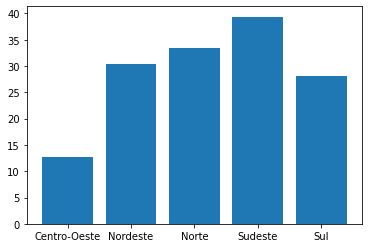

In [14]:
#Plotando gráfico de barras
plt.bar(renov.index.values, renov['Pot_fis'].values);

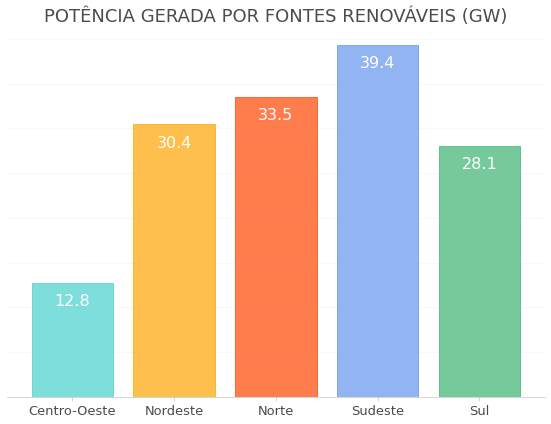

In [15]:
#Plotando gráfico de barras mais apresentável
#Definindo figura e eixos
fig, ax = plt.subplots(figsize=(8,6))

#Plotando barras
bars =  plt.bar(renov.index.values, renov['Pot_fis'].values, alpha = 0.7)

#Definindo cores das barras
bars[0].set_color('mediumturquoise')
bars[1].set_color('orange')
bars[2].set_color('orangered')
bars[3].set_color('cornflowerblue')
bars[4].set_color('mediumseagreen')

#Apagando algumas ticks
ax.tick_params(top=False, bottom=True, left=False,
               right=False, labelleft=False, labelbottom=True) 

#Ajustando os parâmetros das ticks restantes. Os parâmetros color e labelcolor
#recebem uma lista onde cada posição representa o RGBA.
ax.tick_params(axis='x', which='both',
               color=[0,0,0,0.2], labelcolor = [0,0,0,0.7], labelsize = 13)

#Guardando o endereço de cada spine numa lista e
#editando seus parâmetros de visibilidade e transparência
aux = [spine for spine in plt.gca().spines.values()]
aux[0].set_visible(False)
aux[1].set_visible(False)
aux[2].set_alpha(alpha = 0.2)
aux[3].set_visible(False)

#Colocando os valores numéricos em cima de cada barra
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2.5,
                   "{:.1f}".format(bar.get_height()), ha='center', color='w',
                   fontsize=16)
    
#Colocando o título e o grid horizontal
plt.title('POTÊNCIA GERADA POR FONTES RENOVÁVEIS (GW)',fontsize = 18, alpha = 0.7)
plt.grid(axis = 'y', alpha = 0.1)

#Ajustando a área da figura e mostrando o plot resultante
plt.tight_layout()
plt.show()